In [45]:
###################### Machine Learning Project ######################

In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")


In [3]:
# reading traint dataset
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
# removing the 'Id' column
df = df.drop('Id',1)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


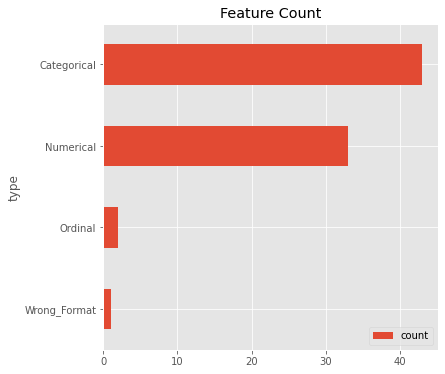

In [5]:
# ploting the count of each type of features
count_ = [['Numerical',33],['Categorical', 43], ['Ordinal',2],['Wrong_Format',1]]
feature_count = pd.DataFrame(count_,columns=['type','count'])
feature_count = feature_count.set_index('type')
matplotlib.rcParams['figure.figsize'] = (6, 6)
feature_count.sort_values('count', ascending=True).plot(kind = 'barh', title = 'Feature Count')

RoofMatl           0
Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
BsmtExposure      38
BsmtFinType2      38
GarageYrBlt       81
GarageQual        81
GarageFinish      81
GarageCond        81
GarageType        81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64


Text(0, 0.5, 'Features')

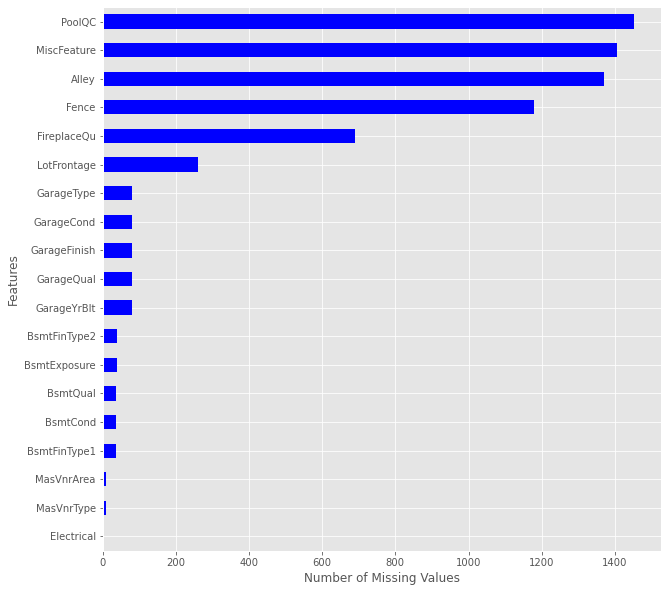

In [6]:
# Null values 

print(np.sum(df.isna()).sort_values().tail(20))
plt.figure(figsize=(10,10))
np.sum(df.isna()).sort_values().tail(19).plot(kind = 'barh', color = 'blue')
plt.xlabel('Number of Missing Values')
plt.ylabel('Features')

In [7]:
df2 = df.copy()
target = pd.Series(df2.SalePrice , name='SalePrice')
df2 = df2.drop('SalePrice',1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.3, random_state=42)
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
135,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal
1452,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
762,60,FV,72.0,8640,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,Con,Normal
932,20,RL,84.0,11670,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
435,60,RL,43.0,10667,Pave,NaN,IR2,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,4,2009,ConLw,Normal


In [8]:
# imputation of train set

# for these features, it's highly possible that missing value caused by nonexistance of the the specific feature

X_train['PoolQC'] = X_train['PoolQC'].replace(np.nan,'NA')
X_train['MiscFeature'] = X_train['MiscFeature'].replace(np.nan,'NA')
X_train['Alley'] = X_train['Alley'].replace(np.nan,'NA')
X_train['Fence'] = X_train['Fence'].replace(np.nan,'NA')
X_train['FireplaceQu'] = X_train['FireplaceQu'].replace(np.nan,'NA')
X_train['GarageType'] = X_train['GarageType'].replace(np.nan,'NA')
X_train['GarageCond'] = X_train['GarageCond'].replace(np.nan,'NA')
X_train['GarageFinish'] = X_train['GarageFinish'].replace(np.nan,'NA')
X_train['GarageQual'] = X_train['GarageQual'].replace(np.nan,'NA')
X_train['BsmtFinType2'] = X_train['BsmtFinType2'].replace(np.nan,'NA')
X_train['BsmtExposure'] = X_train['BsmtExposure'].replace(np.nan,'NA')
X_train['BsmtQual'] = X_train['BsmtQual'].replace(np.nan,'NA')
X_train['BsmtCond'] = X_train['BsmtCond'].replace(np.nan,'NA')
X_train['BsmtFinType1'] = X_train['BsmtFinType1'].replace(np.nan,'NA')
X_train['MasVnrType'] = X_train['MasVnrType'].replace(np.nan, None) #*****
X_train['MasVnrArea'] = X_train['MasVnrArea'].replace(np.nan, X_train.MasVnrArea.mean()) #*****
# we use mode for type of electrical
X_train['Electrical'] = X_train['Electrical'].replace(np.nan,X_train.Electrical.mode())

# We first groupby neighborhood and then use the median in each neighborhood
X_train['LotFrontage'] = X_train.replace(np.nan,X_train.groupby('Neighborhood').LotFrontage.mean()) #*****

# be extra careful with garage year build
X_train['GarageYrBlt'] = X_train['GarageYrBlt'].replace(np.nan, None) #******
 

In [9]:
# We need to change this feature to categorical because numeric codes don't represent any meaningful number
X_train['MSSubClass'] = X_train.MSSubClass.apply(lambda x: str(x))

In [10]:
X_train['LotFrontage'] = X_train.LotFrontage.apply(lambda x: int(x))

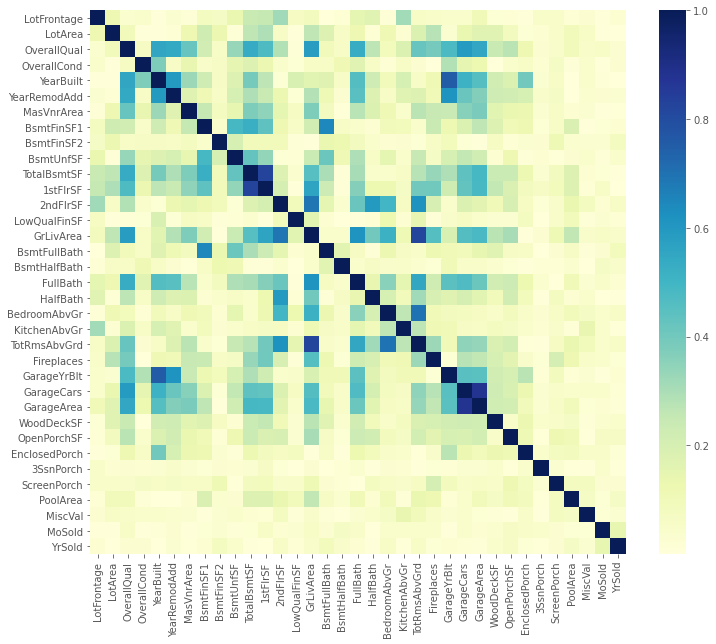

In [11]:
plt.figure(figsize=(12,10))
cor = X_train.corr().apply(lambda x:np.abs(x))
sns.heatmap(cor, annot=False, cmap ="YlGnBu")

Text(0.5, 0, 'Correlation Coefficient')

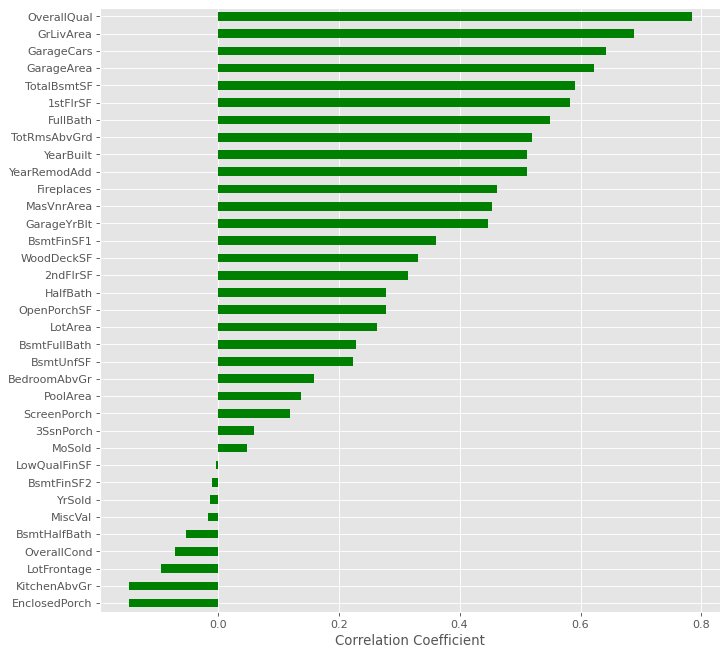

In [12]:
numerical_mask = X_train.dtypes!=object
numerical_features = X_train.columns[numerical_mask]
corr_w_target = pd.DataFrame(X_train[numerical_features].apply(lambda x: (x.corr(y_train))))
corr_w_target.columns = ['Correlation']
# corr_w_target
plt.figure(figsize = (10,10),dpi=80)
corr_w_target.Correlation.sort_values().plot(kind = 'barh',color = 'green')
plt.xlabel('Correlation Coefficient')

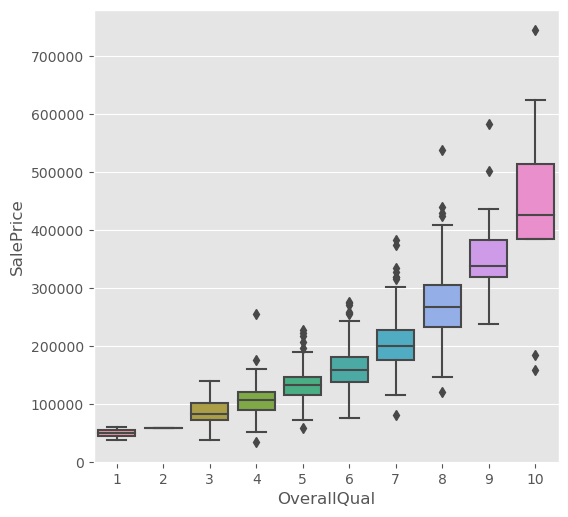

In [13]:
# Some EDA
plt.figure(figsize=(6,6),dpi=100)
#sns.boxplot(x ='OverallQual',y ='SalePrice',data = df)
sns.boxplot(x =X_train['OverallQual'],y = y_train)

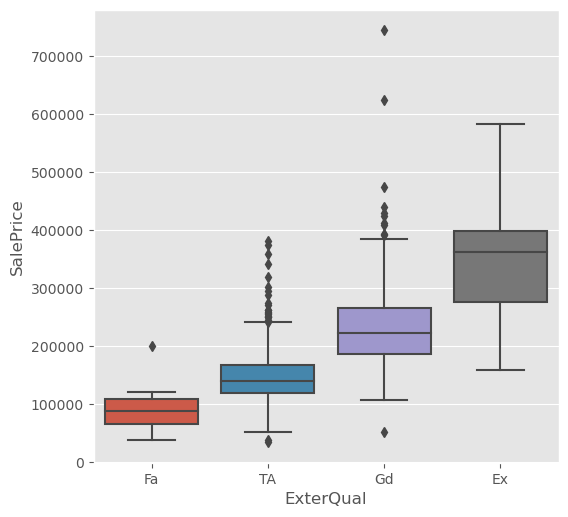

In [14]:
plt.figure(figsize=(6,6),dpi=100)
sns.boxplot(x =X_train['ExterQual'],y =y_train, order=['Fa','TA','Gd','Ex'])

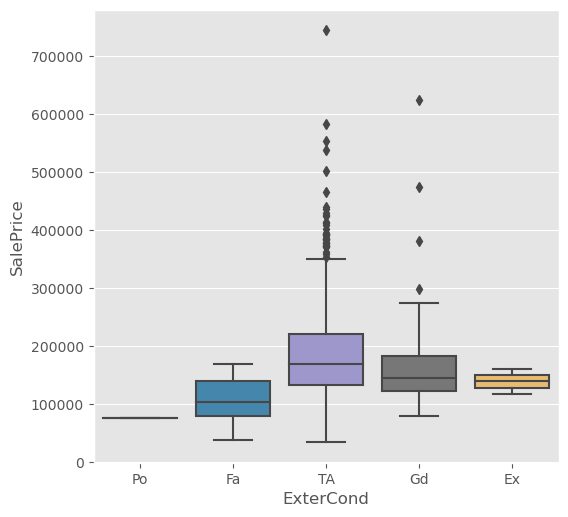

In [15]:
plt.figure(figsize=(6,6),dpi=100)
sns.boxplot(x =X_train['ExterCond'],y =y_train, order=['Po','Fa','TA','Gd','Ex'])

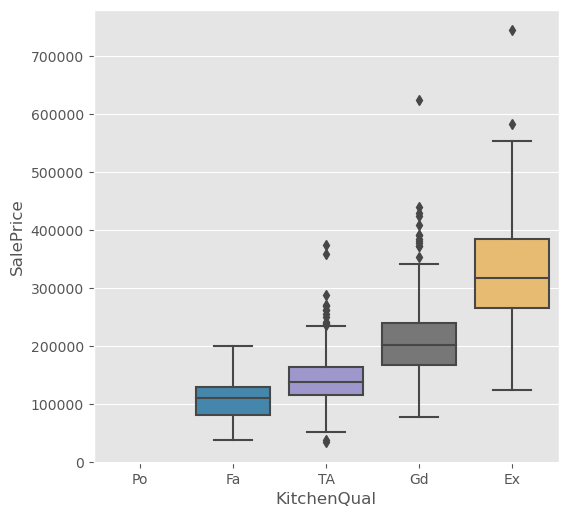

In [16]:
plt.figure(figsize=(6,6),dpi=100)
sns.boxplot(x =X_train['KitchenQual'],y =y_train, order=['Po','Fa','TA','Gd','Ex'])

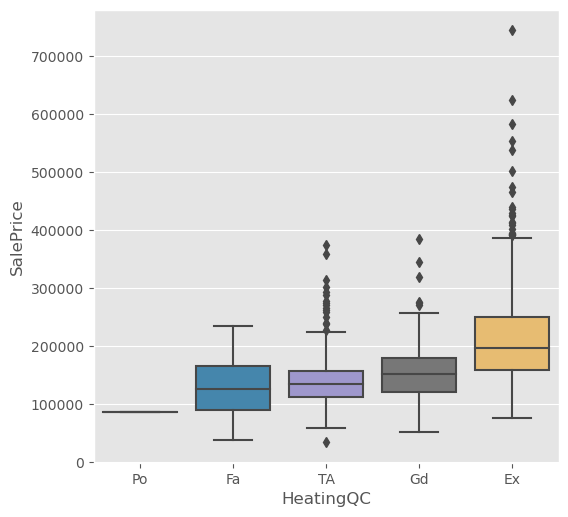

In [17]:
plt.figure(figsize=(6,6),dpi=100)
sns.boxplot(x =X_train['HeatingQC'],y =y_train, order=['Po','Fa','TA','Gd','Ex'])

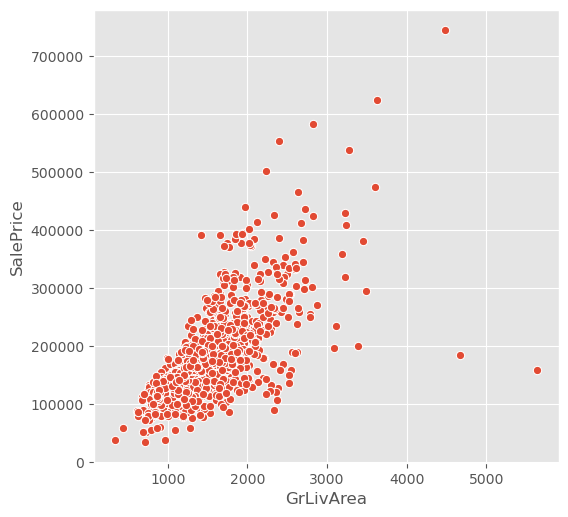

In [18]:
plt.figure(figsize=(6,6),dpi=100)
sns.scatterplot(x =X_train['GrLivArea'],y =y_train)

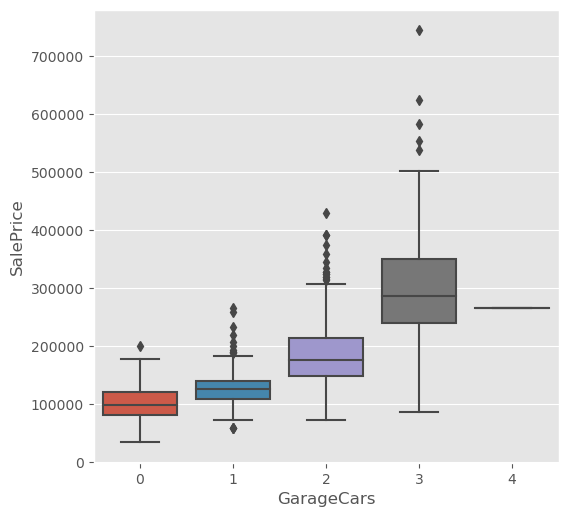

In [19]:
plt.figure(figsize=(6,6),dpi=100)
sns.boxplot(x =X_train['GarageCars'],y =y_train)

In [20]:
# we only have 5 observations with 1 Garages
X_train[X_train['GarageCars']==4]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
747,70,RM,70,11700,Pave,Pave,IR1,Lvl,AllPub,Corner,...,0,0,NA,NA,NA,0,5,2009,WD,Normal


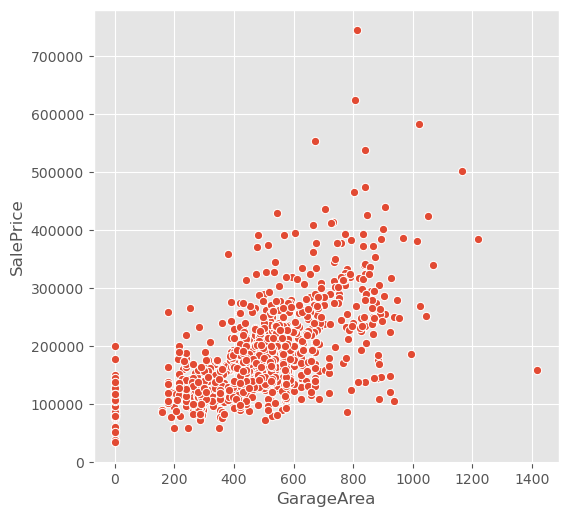

In [21]:
plt.figure(figsize = (6,6),dpi = 100)
sns.scatterplot(x =X_train['GarageArea'],y =y_train)

Text(0, 0.5, 'Frequency')

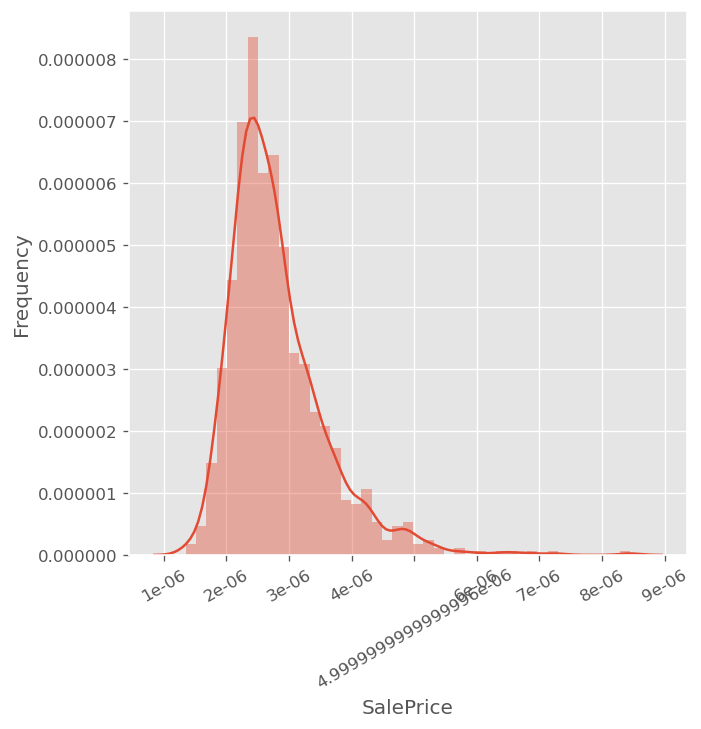

In [22]:
# Normality test
plt.figure(figsize = (6,6),dpi = 120)
b = sns.distplot(y_train)
b.set_xticklabels(b.get_yticks(), size = 10)
b.set_xticklabels(b.get_xticklabels(), rotation=30)
#b.ticklabel_format(style='plain',axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Frequency')

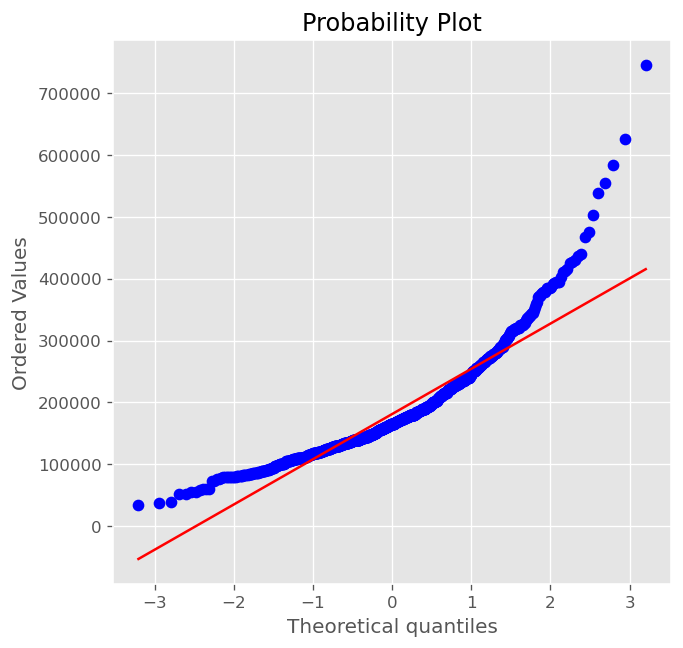

In [23]:
# Normality test
plt.figure(figsize = (6,6),dpi = 120)
import pylab 
import scipy.stats as stats
 
stats.probplot(y_train, dist="norm", plot=pylab)
pylab.show()

Text(0, 0.5, 'Frequency')

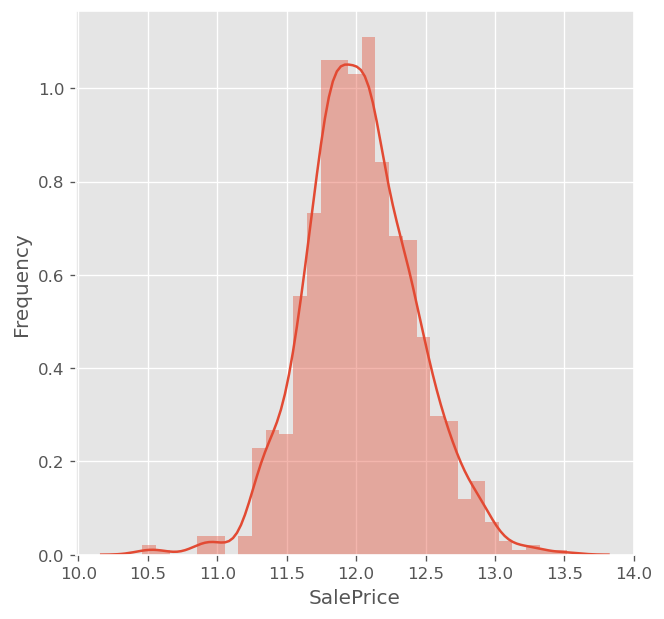

In [24]:
plt.figure(figsize = (6,6),dpi = 120)
sns.distplot(y_train.apply(lambda x: np.log(x)))
plt.ylabel('Frequency')

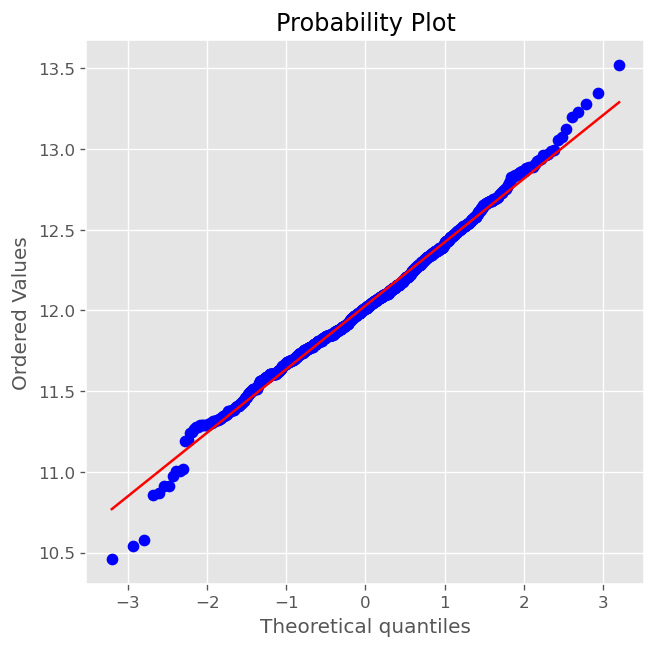

In [25]:
# transforming the SalePrice to log(SalePrice)
plt.figure(figsize = (6,6),dpi = 120)
import pylab 
import scipy.stats as stats
 
stats.probplot(y_train.apply(lambda x: np.log(x)), dist="norm", plot=pylab)
pylab.show()

In [26]:
# changing the 'SalePrice' to log(SalePrice)
y_train = y_train.apply(lambda x: np.log(x))
y_test = y_test.apply(lambda x: np.log(x))

In [27]:
# dropping the two outliers
X_train.loc[X_train['GrLivArea']>4500]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
523,60,RL,60,40094,Pave,NA,IR1,Bnk,AllPub,Inside,...,0,0,NA,NA,NA,0,10,2007,New,Partial
1298,60,RL,60,63887,Pave,NA,IR3,Bnk,AllPub,Corner,...,0,480,Gd,NA,NA,0,1,2008,New,Partial


In [28]:
X_train = X_train.drop([523,1298],0)

In [29]:
y_train = y_train.drop([523,1298],0)

In [30]:
# making a list of all categorical features
categorical_mask = X_train.dtypes==object
categorical_columns = X_train.columns[categorical_mask].tolist()
categorical_columns

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [31]:
# dummifying categorical features
for colname in categorical_columns:
    colname1 = pd.get_dummies(X_train[colname], prefix=colname, prefix_sep='__')
    colname1 = colname1.drop(colname +'__'+str(X_train[colname].mode()[0]), axis=1)
#     colname1.head()
    X_train = pd.concat([X_train.drop(colname, axis=1), colname1], axis=1)
X_train

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Partial
135,20,10400,7,6,1970,1970,288.0,0,0,1304,...,0,0,0,0,0,0,0,0,0,0
1452,180,3675,5,5,2005,2005,80.0,547,0,0,...,0,0,0,0,0,0,0,0,0,0
762,60,8640,7,5,2009,2009,0.0,24,0,732,...,0,0,0,0,0,0,0,0,0,0
932,20,11670,9,5,2006,2006,302.0,0,0,1905,...,0,0,0,0,0,0,0,0,0,0
435,60,10667,7,6,1996,1996,0.0,385,344,70,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,9317,6,5,2006,2006,0.0,24,0,1290,...,0,0,0,0,0,0,0,0,0,0
1130,50,7804,4,3,1928,1950,0.0,622,0,500,...,0,0,0,0,0,0,0,0,0,0
1294,20,8172,5,7,1955,1990,0.0,167,0,697,...,0,0,0,0,0,0,0,0,0,0
860,50,7642,7,8,1918,1998,0.0,0,0,912,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# imputation of test set

# for these features, it's highly possible that missing value caused by nonexistance of the the specific feature

X_test['PoolQC'] = X_test['PoolQC'].replace(np.nan,'NA')
X_test['MiscFeature'] = X_test['MiscFeature'].replace(np.nan,'NA')
X_test['Alley'] = X_test['Alley'].replace(np.nan,'NA')
X_test['Fence'] = X_test['Fence'].replace(np.nan,'NA')
X_test['FireplaceQu'] = X_test['FireplaceQu'].replace(np.nan,'NA')
X_test['GarageType'] = X_test['GarageType'].replace(np.nan,'NA')
X_test['GarageCond'] = X_test['GarageCond'].replace(np.nan,'NA')
X_test['GarageFinish'] = X_test['GarageFinish'].replace(np.nan,'NA')
X_test['GarageQual'] = X_test['GarageQual'].replace(np.nan,'NA')
X_test['BsmtFinType2'] = X_test['BsmtFinType2'].replace(np.nan,'NA')
X_test['BsmtExposure'] = X_test['BsmtExposure'].replace(np.nan,'NA')
X_test['BsmtQual'] = X_test['BsmtQual'].replace(np.nan,'NA')
X_test['BsmtCond'] = X_test['BsmtCond'].replace(np.nan,'NA')
X_test['BsmtFinType1'] = X_test['BsmtFinType1'].replace(np.nan,'NA')
X_test['MasVnrType'] = X_test['MasVnrType'].replace(np.nan, None) #*****
X_test['MasVnrArea'] = X_test['MasVnrArea'].replace(np.nan, X_test.MasVnrArea.mean()) #*****
# we use mode for type of electrical
X_test['Electrical'] = X_test['Electrical'].replace(np.nan,X_test.Electrical.mode())

# We first groupby neighborhood and then use the median in each neighborhood
X_test['LotFrontage'] = X_test.replace(np.nan,X_test.groupby('Neighborhood').LotFrontage.mean()) #*****

# be extra careful with garage year build
X_test['GarageYrBlt'] = X_test['GarageYrBlt'].replace(np.nan, None) #******

# We need to change this feature to categorical because numeric codes don't represent any meaningful number
X_test['MSSubClass'] = X_test.MSSubClass.apply(lambda x: str(x))

X_test['LotFrontage'] = X_test.LotFrontage.apply(lambda x: int(x))

In [33]:
np.sum(X_test.isna()).sort_values().head(30)

MSSubClass      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
GarageType      0
HalfBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Electrical      0
FullBath        0
CentralAir      0
GarageYrBlt     0
GarageCars      0
YrSold          0
MoSold          0
MiscVal         0
MiscFeature     0
Fence           0
PoolQC          0
PoolArea        0
GarageFinish    0
ScreenPorch     0
dtype: int64

In [34]:
# making a list of all categorical features
categorical_mask_t = X_test.dtypes==object
categorical_columns_t = X_test.columns[categorical_mask_t].tolist()
print(len(categorical_columns_t))
categorical_columns_t

44


['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [35]:
# dummifying categorical features for the test set
for colname in categorical_columns_t:
    colname1 = pd.get_dummies(X_test[colname], prefix=colname, prefix_sep='__')
    colname1 = colname1.drop(colname +'__'+str(X_test[colname].mode()[0]), axis=1)
#     colname1.head()
    X_test = pd.concat([X_test.drop(colname, axis=1), colname1], axis=1)
X_test

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType__COD,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleCondition__Abnorml,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Partial
892,20,8414,6,8,1963,2003,0.000000,663,0,396,...,0,0,0,0,0,0,0,0,0,0
1105,60,12256,8,5,1994,1995,362.000000,1032,0,431,...,0,0,0,0,0,0,0,0,0,0
413,30,8960,5,6,1927,1950,0.000000,0,0,1008,...,0,0,0,0,0,0,0,0,0,0
522,50,5000,6,7,1947,1950,0.000000,399,0,605,...,0,0,0,0,0,0,0,0,0,0
1036,20,12898,9,5,2007,2008,70.000000,1022,0,598,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,20,8176,5,6,1958,1992,0.000000,846,0,210,...,0,0,0,0,0,0,0,0,0,0
323,20,5820,3,8,1955,2005,0.000000,256,0,906,...,0,0,0,0,0,0,0,0,0,0
650,60,8125,7,6,2007,2007,99.976905,0,0,813,...,0,0,0,0,0,0,0,0,0,0
439,50,12354,6,8,1920,2000,0.000000,0,0,684,...,0,0,1,0,0,0,0,0,0,0


In [36]:
# Since the number of columns are different in the test and train sets we need to remedy that:

X_test_dummy = X_test.copy()
X_train_dummy = X_train.copy()

for colname in X_train.columns:
    if colname in X_test.columns:
        continue
    else:
        X_test_dummy[colname] = 0

for colname in X_test.columns:
    if colname in X_train.columns:
        continue
    else:
        X_train_dummy[colname] = 0
        
        
print(X_test_dummy.shape)
print(X_train_dummy.shape)

(438, 272)
(1020, 272)


In [37]:
from sklearn.linear_model import LinearRegression 

ols = LinearRegression()
ols.fit(X_train_dummy, y_train)
print("R^2 for train set: %f" %ols.score(X_train_dummy, y_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_test_dummy, y_test))

R^2 for train set: 0.956098
--------------------------------------------------
R^2 for test  set: -8.583250


In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

lasso = Lasso()
lasso.set_params(normalize=True)
lasso_scores_train = []
lasso_scores_test  = []

alphas = np.linspace(0.0004, 0.003, 1000)

for alpha in alphas:
            lasso.set_params(alpha=alpha)
            lasso.fit(X_train_dummy, y_train)
            lasso_scores_train.append(lasso.score(X_train_dummy, y_train))
            lasso_scores_test.append(lasso.score(X_test_dummy, y_test))
lasso_scores_train = np.array(lasso_scores_train) 
lasso_scores_test  = np.array(lasso_scores_test)

Text(0, 0.5, '$R^2$')

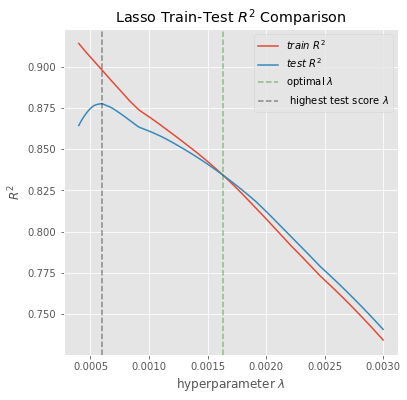

In [39]:
plt.plot(alphas, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, lasso_scores_test, label=r'$test\ R^2$')
# plt.legend(loc=1)
plt.title(r'Lasso Train-Test $R^2$ Comparison')
lasso_underfit = lasso_scores_train < lasso_scores_test
last_underfit  = np.min(alphas[lasso_underfit])
index_max = np.argmax(lasso_scores_test)
max_test = alphas[index_max]
plt.axvline(last_underfit, linestyle='--', color='g', label='optimal $\lambda$', alpha=0.4)
plt.axvline(max_test, linestyle='--', color='black', label=' highest test score $\lambda$', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [40]:
ridge = Ridge()
ridge.set_params(normalize=True)
ridge_scores_train = []
ridge_scores_test  = []

alphas = np.linspace(1, 10, 1000)

for alpha in alphas:
            ridge.set_params(alpha=alpha)
            ridge.fit(X_train_dummy, y_train)
            ridge_scores_train.append(ridge.score(X_train_dummy, y_train))
            ridge_scores_test.append(ridge.score(X_test_dummy, y_test))
ridge_scores_train = np.array(ridge_scores_train) 
ridge_scores_test  = np.array(ridge_scores_test)

Text(0, 0.5, '$R^2$')

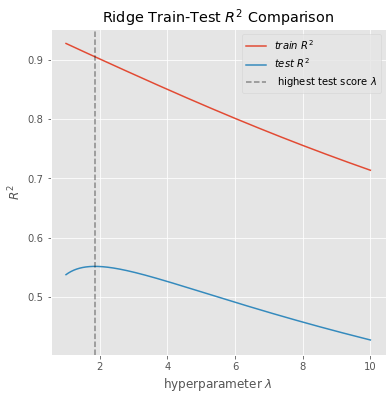

In [41]:
plt.plot(alphas, ridge_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, ridge_scores_test, label=r'$test\ R^2$')
# plt.legend(loc=1)
plt.title(r'Ridge Train-Test $R^2$ Comparison')
ridge_underfit = ridge_scores_train < ridge_scores_test
# last_underfit  = np.min(alphas[ridge_underfit])
index_max = np.argmax(ridge_scores_test)
max_test = alphas[index_max]
# plt.axvline(last_underfit, linestyle='--', color='g', label='optimal $\lambda$', alpha=0.4)
plt.axvline(max_test, linestyle='--', color='black', label=' highest test score $\lambda$', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [1]:
# Trying lasso cross validation to see if we can improve the model  -> NO improvement :(
from sklearn.linear_model import LassoCV

reg = LassoCV(cv=5, random_state=0,eps=0.001, n_alphas=10000).fit(X_train_dummy, y_train)
reg.score(X_test_dummy,y_test)

NameError: name 'X_train_dummy' is not defined

In [42]:
# Now we need to find the model coefficients for the best lambda parameter (optimal)

print(last_underfit)

lasso.set_params(alpha = last_underfit )
lasso.fit(X_train_dummy, y_train)


0.0016310310310310308


Lasso(alpha=0.0016310310310310308, normalize=True)

In [43]:
coeff_ = pd.Series(lasso.coef_)
colnames = pd.Series(X_train.columns)

lasso_coeff = pd.concat([colnames, coeff_],1)
lasso_coeff.columns = ['ColName','Coefficient']
lasso_coeff

,ColName,Coefficient
0,LotFrontage,-0.000000
1,LotArea,0.000000
2,OverallQual,0.093949
3,OverallCond,0.000000
4,YearBuilt,0.000770
...,...,...
267,NaN,0.000000
268,NaN,0.000000
269,NaN,0.000000
270,NaN,0.000000


In [44]:
lasso_coeff = lasso_coeff.set_index('ColName')

In [45]:
lasso_coeff

,Coefficient
ColName,
LotFrontage,-0.000000
LotArea,0.000000
OverallQual,0.093949
OverallCond,0.000000
YearBuilt,0.000770
...,...
NaN,0.000000
NaN,0.000000
NaN,0.000000


In [46]:
lasso_coeff.Coefficient.apply(lambda x: np.abs(x)).sort_values().tail(11)

ColName
BsmtFinSF1       0.000039
GarageArea       0.000089
TotalBsmtSF      0.000093
GrLivArea        0.000197
YearBuilt        0.000770
YearRemodAdd     0.001126
Fireplaces       0.014509
CentralAir__N    0.015884
MSZoning__RM     0.021496
GarageCars       0.042893
OverallQual      0.093949
Name: Coefficient, dtype: float64

Text(0.5, 1.0, 'Lasso Feature Importance')

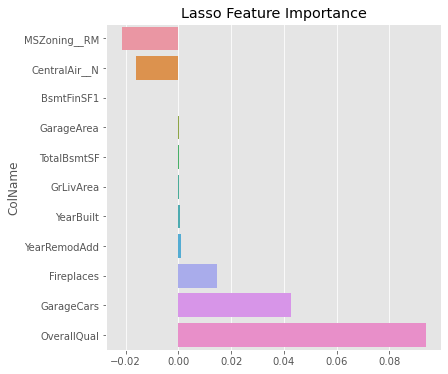

In [47]:
co = pd.Series(lasso_coeff[lasso_coeff['Coefficient']!=0].Coefficient.sort_values().tolist())
va = pd.Series(lasso_coeff[lasso_coeff['Coefficient']!=0].Coefficient.sort_values().index)
cova = pd.concat([co,va],1)
sns.barplot( x = co , y = va , data =cova ,orient='h' )
plt.title('Lasso Feature Importance' )

Text(0.5, 1.0, 'Lasso Feature Importance (absolute)')

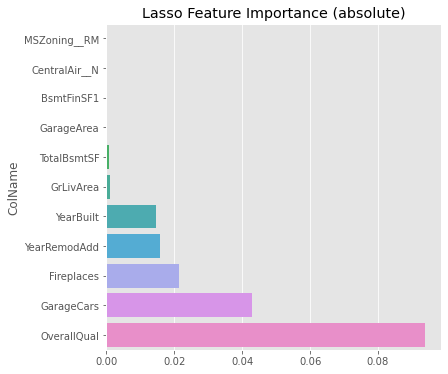

In [48]:
co = pd.Series(lasso_coeff[lasso_coeff['Coefficient']!=0].apply(lambda x:np.abs(x)).Coefficient.sort_values(ascending =True).tolist())
va = pd.Series(lasso_coeff[lasso_coeff['Coefficient']!=0].Coefficient.sort_values().index)
cova = pd.concat([co,va],1)
sns.barplot( x = co , y = va , data =cova ,orient='h' )
plt.title('Lasso Feature Importance (absolute)' )

In [ ]:
# create a list of features that showed up in our Lasso model

In [49]:
# create a list of features that showed up in our Lasso model

sig_features = lasso_coeff.Coefficient.apply(lambda x: np.abs(x)).sort_values().tail(11).index.tolist()
sig_features

['BsmtFinSF1',
 'GarageArea',
 'TotalBsmtSF',
 'GrLivArea',
 'YearBuilt',
 'YearRemodAdd',
 'Fireplaces',
 'CentralAir__N',
 'MSZoning__RM',
 'GarageCars',
 'OverallQual']

In [50]:
# adding what hasn't showed up in the feature list(for categorical features)
sig_features.extend(['CentralAir__Y','MSZoning__RP','MSZoning__RL','MSZoning__RH','MSZoning__I',
                     'MSZoning__FV','MSZoning__C','MSZoning__A'])

In [51]:
print(sig_features)

['BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'GrLivArea', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'CentralAir__N', 'MSZoning__RM', 'GarageCars', 'OverallQual', 'CentralAir__Y', 'MSZoning__RP', 'MSZoning__RL', 'MSZoning__RH', 'MSZoning__I', 'MSZoning__FV', 'MSZoning__C', 'MSZoning__A']


In [52]:
#  finding only features which are in our dataframe
sig_features_m = []
for feature in sig_features:
    if feature in X_train_dummy.columns:
        sig_features_m.append(feature)
sig_features_m

['BsmtFinSF1',
 'GarageArea',
 'TotalBsmtSF',
 'GrLivArea',
 'YearBuilt',
 'YearRemodAdd',
 'Fireplaces',
 'CentralAir__N',
 'MSZoning__RM',
 'GarageCars',
 'OverallQual',
 'MSZoning__RH',
 'MSZoning__FV']

In [53]:
# slicing the data frame to only significant features

X_train_dummy_fe = X_train_dummy.copy()
X_test_dummy_fe = X_test_dummy.copy()

X_train_dummy_fe = X_train_dummy_fe[sig_features_m]
X_test_dummy_fe = X_test_dummy_fe[sig_features_m]

In [52]:
# testing MLR after feature selection

ols = LinearRegression()
ols.fit(X_train_dummy_fe, y_train)
print("R^2 for train set: %f" %ols.score(X_train_dummy_fe, y_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_test_dummy_fe, y_test))

# Are they close now ? YES! :)

R^2 for train set: 0.888355
--------------------------------------------------
R^2 for test  set: 0.881534


In [57]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [56]:
# Eleastic net on Full model -> Overfitting is obvious in scores :)

elasticnet = ElasticNet()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = {'alpha' :np.linspace(1e-7,1e-2,50),'l1_ratio' :np.linspace(0,1,10)}
search = GridSearchCV(elasticnet,grid, cv=cv, n_jobs= -1)
results = search.fit(X_train_dummy, y_train)

print('train score with full features: %.3f' % results.best_score_)
print('best parameters: %s' % results.best_params_)
print('-'*50)

best_params = list(results.best_params_.values())
best_alpha = best_params[0]
best_rho = best_params[1]

elasticnet.set_params(alpha=best_alpha, l1_ratio=best_rho)
elasticnet.fit(X_train_dummy, y_train)
print('test score with full features %f'%elasticnet.score(X_test_dummy, y_test))

train score with full features: 0.917
best parameters: {'alpha': 0.0028572142857142854, 'l1_ratio': 0.1111111111111111}
--------------------------------------------------
test score with full features 0.828421


In [54]:
# Eleastic net on reduced model (features engineered from Lasso)

elasticnet = ElasticNet()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = {'alpha' :np.linspace(1e-4,1e-2,50),'l1_ratio' :np.linspace(0,1,10)}
search = GridSearchCV(elasticnet,grid, cv=cv)
results = search.fit(X_train_dummy_fe, y_train)

print('train score with reduced features: %.3f' % results.best_score_)
print('best parameters: %s' % results.best_params_)
print('-'*50)

best_params = list(results.best_params_.values())
best_alpha = best_params[0]
best_rho = best_params[1]

elasticnet.set_params(alpha=best_alpha, l1_ratio=best_rho)
elasticnet.fit(X_train_dummy_fe, y_train)
print('test score with reduced features %f'%elasticnet.score(X_test_dummy_fe, y_test))

train score with reduced features: 0.884
best parameters: {'alpha': 0.007373469387755103, 'l1_ratio': 0.0}
--------------------------------------------------
test score with reduced features 0.881655


In [55]:
search.best_score_

0.8840673709340886

In [58]:
# Random Forest on Full model

from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor()
#randomForest.set_params(max_features = 100)
#randomForest.set_params(max_depth = 100)

grid_para_forest = [{
    "n_estimators": [1000],
    "min_samples_leaf": range(1, 10),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int),
    "max_features": [25,50,100],
    "random_state": [42]}]
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, cv=5, n_jobs = -1)

%time grid_search_forest.fit(X_train_dummy, y_train)
print('\ntrain score : %f'%grid_search_forest.best_score_ )
print('-'*70)
print('test score : %f'%grid_search_forest.score(X_test_dummy,y_test) )
print('-'*70)
grid_search_forest.best_params_

Wall time: 18min 45s

train score : 0.878328
----------------------------------------------------------------------
test score : 0.869660
----------------------------------------------------------------------


{'max_features': 100,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 1000,
 'random_state': 42}

In [71]:
# finding feature importance for full model
cn = pd.Series(X_test_dummy.columns)
fi = pd.Series(grid_search_forest.best_estimator_.feature_importances_)
cnfi = pd.concat([cn,fi],1)
cnfi.columns = ['cn','fi']
cnfi = cnfi[cnfi.fi > 1e-2]
cnfi = cnfi.sort_values(by = 'fi' , ascending = True)
# cnfi = cnfi.reset_index().drop('index',1)
#sns.barplot( x = fi, y = cn , data = cnfi)
cnfi

,cn,fi
203,FireplaceQu__Po,0.011404
170,BsmtFinType1__ALQ,0.012944
12,2ndFlrSF,0.014103
22,Fireplaces,0.018729
7,BsmtFinSF1,0.020784
1,LotArea,0.022184
5,YearRemodAdd,0.022686
17,FullBath,0.027260
11,1stFlrSF,0.032973
25,GarageArea,0.045155


Text(0, 0.5, 'Feature Name')

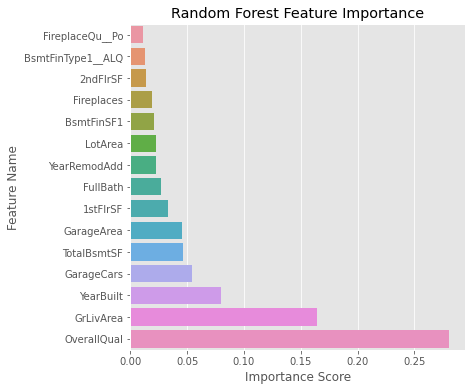

In [72]:
import seaborn as sns
cn1 = pd.Series(cnfi.cn)
fi1 = pd.Series(cnfi.fi)
cnfi1 = pd.concat([fi1,cn1],1)
cnfi1.columns = ['fi1','cn1']
cnfi1
sns.barplot( x = fi1, y = cn1 , data = cnfi1)
plt.title('Random Forest Feature Importance' )
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')

In [170]:
# Random Forest on reduced model (Engineered features)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor()
#randomForest.set_params(max_features = 100)
#randomForest.set_params(max_depth = 100)

grid_para_forest = [{
    "n_estimators": [100,500,1000],
    "min_samples_leaf": range(1, 10),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int),
    "max_features": [3,5,7,9],
    "random_state": [42]}]
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, cv=5 )

%time grid_search_forest.fit(X_train_dummy_fe, y_train)
print('\ntrain score : %f'%grid_search_forest.best_score_ )
print('-'*70)
print('test score : %f'%grid_search_forest.score(X_test_dummy_fe,y_test) )
print('-'*70)
grid_search_forest.best_params_


CPU times: user 1h 48min 26s, sys: 1min 5s, total: 1h 49min 32s
Wall time: 1h 59min 2s

train score : 0.871640
----------------------------------------------------------------------
test score : 0.878605
----------------------------------------------------------------------


{'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500,
 'random_state': 42}

,cn,fi
0,OverallQual,0.296538
1,GrLivArea,0.207426
2,YearBuilt,0.117983
3,TotalBsmtSF,0.081979
4,GarageCars,0.076911
5,GarageArea,0.070600
6,YearRemodAdd,0.047200
7,BsmtFinSF1,0.042824
8,Fireplaces,0.032339
9,CentralAir__N,0.015592


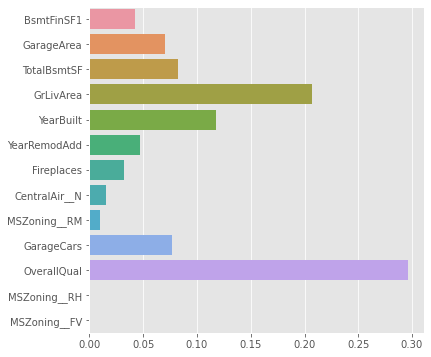

In [171]:
# finding feature importance for reduced model
cn = pd.Series(X_test_dummy_fe.columns)
fi = pd.Series(grid_search_forest.best_estimator_.feature_importances_)
cnfi = pd.concat([cn,fi],1)
cnfi.columns = ['cn','fi']
cnfi = cnfi.sort_values(by = 'fi' , ascending = False)
cnfi = cnfi.reset_index().drop('index',1)
sns.barplot( x = fi, y = cn , data = cnfi)
cnfi

Text(0.5, 1.0, 'Feature Importance for Engineered Dataframe')

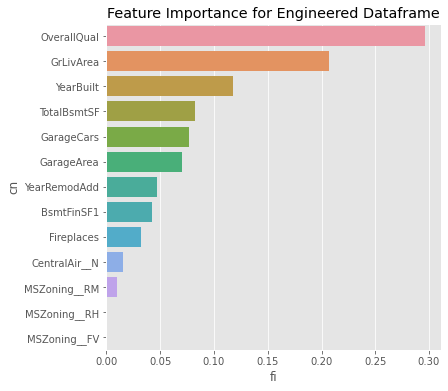

In [172]:
# eventhough it was sorted it needed a trick to plot them sorted !!!
import seaborn as sns
cn1 = pd.Series(cnfi.cn)
fi1 = pd.Series(cnfi.fi)
cnfi1 = pd.concat([fi1,cn1],1)
cnfi1.columns = ['fi1','cn1']
cnfi1
sns.barplot( x = fi1, y = cn1 , data = cnfi1)
plt.title('Feature Importance for Engineered Dataframe' )

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()

grid_para_boost = [{
    "min_samples_leaf": range(1, 10),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int),
    "max_depth": range(2, 10)}]

grid_search_boost = GridSearchCV(gbm, grid_para_boost, cv=5, n_jobs = -1)

%time grid_search_boost.fit(X_train_dummy, y_train)
print('\ntrain score : %f'%grid_search_boost.best_score_ )
print('-'*70)
print('test score : %f'%grid_search_boost.score(X_test_dummy,y_test) )
print('-'*70)
grid_search_boost.best_params_


Wall time: 14min 20s

train score : 0.894075
----------------------------------------------------------------------
test score : 0.875028
----------------------------------------------------------------------


{'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 22}

,fi3,cn3
170,0.006542,BsmtFinType1__ALQ
52,0.007210,MSZoning__RM
11,0.012475,1stFlrSF
3,0.013399,OverallCond
203,0.015611,FireplaceQu__Po
1,0.019012,LotArea
22,0.023645,Fireplaces
7,0.029177,BsmtFinSF1
5,0.030829,YearRemodAdd
25,0.032150,GarageArea


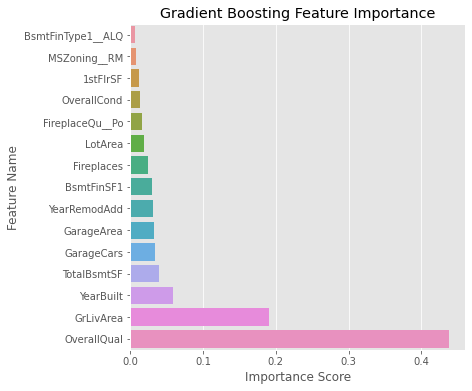

In [70]:
# finding feature importance for Gradient Boosting
cn2 = pd.Series(X_test_dummy.columns)
fi2 = pd.Series(grid_search_boost.best_estimator_.feature_importances_)
cnfi2 = pd.concat([cn2,fi2],1)
cnfi2.columns = ['cn','fi']
cnfi2 = cnfi2[cnfi2.fi > 5e-3]
cnfi2 = cnfi2.sort_values(by = 'fi' , ascending = True)
# cnfi = cnfi.reset_index().drop('index',1)
#sns.barplot( x = fi, y = cn , data = cnfi)


import seaborn as sns
cn3 = pd.Series(cnfi2.cn)
fi3 = pd.Series(cnfi2.fi)
cnfi3 = pd.concat([fi3,cn3],1)
cnfi3.columns = ['fi3','cn3']
cnfi3
sns.barplot( x = fi3, y = cn3 , data = cnfi3)
plt.title('Gradient Boosting Feature Importance' )
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
cnfi3

In [ ]:
# CPU times: user 13min 50s, sys: 5.61 s, total: 13min 56s
# Wall time: 21min 53s

# "n_estimators": [100]
# train score : 0.877472
# ----------------------------------------------------------------------
# test score : 0.858900

# {'max_features': 50,
#  'min_samples_leaf': 1,
#  'min_samples_split': 4,
#  'n_estimators': 100,
#  'random_state': 42}



# CPU times: user 7min 33s, sys: 2.33 s, total: 7min 35s
# Wall time: 7min 36s

# train score : 0.877264
# ----------------------------------------------------------------------
# test score : 0.870403
# ----------------------------------------------------------------------
# {'max_features': 100,
#  'min_samples_leaf': 1,
#  'min_samples_split': 2,
#  'n_estimators': 100,
#  'random_state': 42}


# CPU times: user 9min 44s, sys: 2.24 s, total: 9min 46s
# Wall time: 9min 46s

# train score : 0.877472
# ----------------------------------------------------------------------
# test score : 0.858900
# ----------------------------------------------------------------------
# {'max_features': 50,
#  'min_samples_leaf': 1,
#  'min_samples_split': 4,
#  'n_estimators': 100,
#  'random_state': 42}

# CPU times: user 8min 23s, sys: 4.72 s, total: 8min 28s
# Wall time: 8min 31s

# train score : 0.877472
# ----------------------------------------------------------------------
# test score : 0.858900
# ----------------------------------------------------------------------
# {'max_features': 50,
#  'min_samples_leaf': 1,
#  'min_samples_split': 4,
#  'n_estimators': 100,
#  'random_state': 42}

# ali = pd.DataFrame(X_train_dummy.columns)
# ali
# ali.to_csv()